In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving FDNY_Firehouse_Listing.csv to FDNY_Firehouse_Listing.csv
User uploaded file "FDNY_Firehouse_Listing.csv" with length 28072 bytes


In [ ]:
import matplotlib.pyplot as plt
import folium


figure_height = 9
figure_width = 16

In [ ]:
import pandas as pd
import numpy as np
import io
df = pd.read_csv("/content/FDNY_Firehouse_Listing.csv")
print(df.head())



                                        FacilityName     FacilityAddress  \
0                                 Engine 4/Ladder 15     42 South Street   
1                                           Engine 6   49 Beekman Street   
2  Manhattan Borough Command/Battalion 1/Engine 7...    100 Duane Street   
3                                           Ladder 8  14 N. Moore Street   
4                                  Engine 9/Ladder 6     75 Canal Street   

     Borough  Postcode   Latitude  Longitude  Community Board  \
0  Manhattan     10005  40.703694 -74.007717              101   
1  Manhattan     10038  40.709971 -74.005395              101   
2  Manhattan     10007  40.715339 -74.006300              101   
3  Manhattan     10013  40.719574 -74.006620              101   
4  Manhattan     10002  40.715408 -73.992834              103   

   Community Council   Census Tract      BIN         BBL  \
0                   1             7  1000867  1000350001   
1                   1          1

In [59]:


m = folium.Map(location = [40.74, -73.98], zoom_start=11,min_zoom=10)


for index, row in df.iterrows():
    borough =  row["Borough"]
    match borough:
      case "Queens":
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=row['FacilityName'],
            icon=folium.Icon(color="green", prefix="fa", icon="fire-extinguisher")
        ).add_to(m)
      case "Staten Island":
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=row['FacilityName'],
            icon=folium.Icon(color="red", prefix="fa", icon="fire-extinguisher")
        ).add_to(m)

      case "Bronx":
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=row['FacilityName'],
            icon=folium.Icon(color="beige", prefix="fa", icon="fire-extinguisher")
        ).add_to(m)
      case "Brooklyn":
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=row['FacilityName'],
            icon=folium.Icon(color="purple", prefix="fa", icon="fire-extinguisher")
        ).add_to(m)
      case "Manhattan":
        if row['FacilityName'] == "Ladder 8":
          folium.Marker(
              location=[row['Latitude'], row['Longitude']],
              popup=row['FacilityName'],
              icon=folium.Icon(color="blue", prefix="fa", icon="ghost")
          ).add_to(m)

        else:

          folium.Marker(
              location=[row['Latitude'], row['Longitude']],
              popup=row['FacilityName'],
              icon=folium.Icon(color="blue", prefix="fa", icon="fire-extinguisher")
          ).add_to(m)
      case _:
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=row['FacilityName'],
            icon=folium.Icon(color="black", prefix="fa", icon="fire-extinguisher")
        ).add_to(m)



m


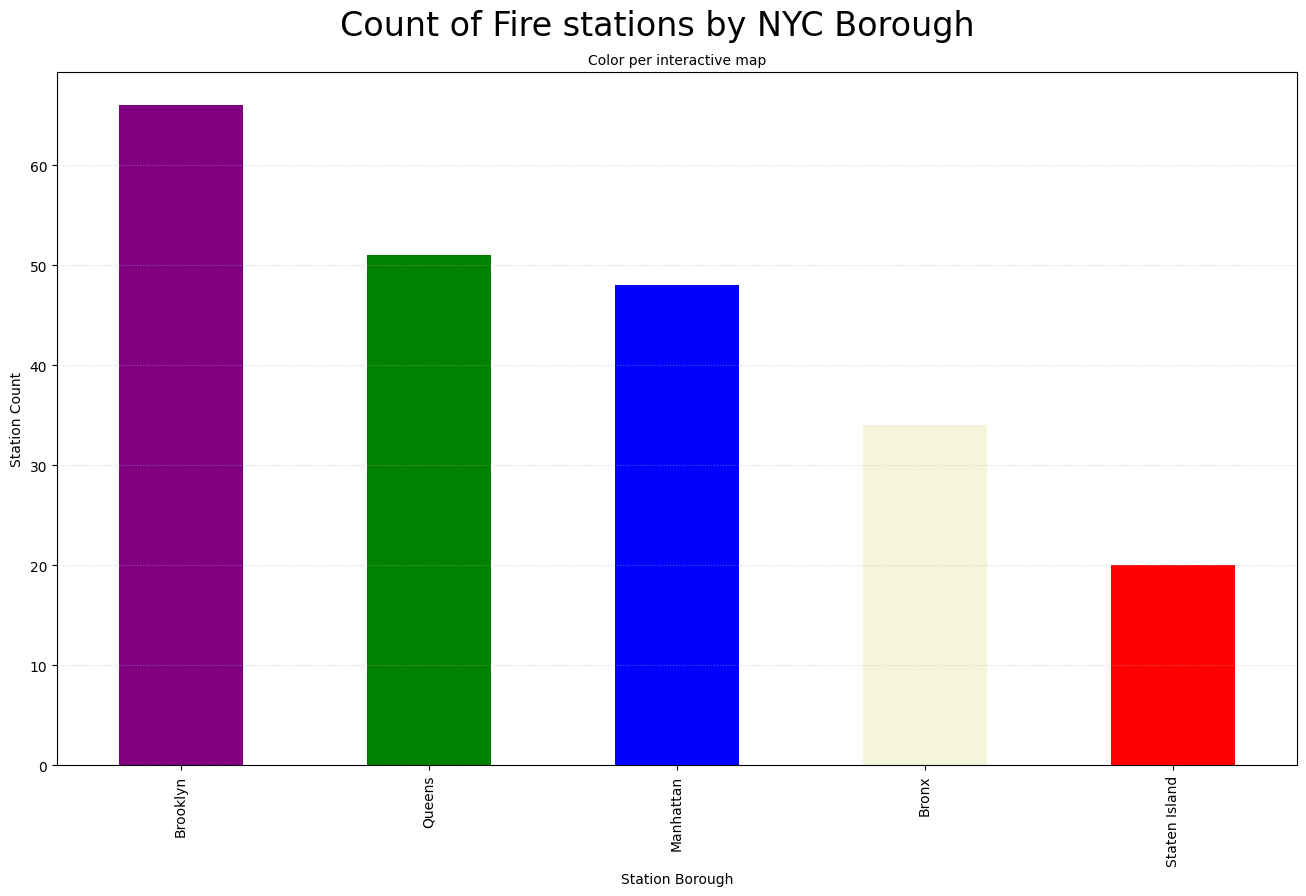

In [ ]:

fig, ax = plt.subplots(figsize=(figure_width,figure_height))

value_counts = df['Borough'].value_counts()
color=['purple', 'green', 'blue','beige','red']
# Create a bar chart
ax = value_counts.plot(kind='bar',color=color)
ax.grid(axis='y',alpha = 0.5,linestyle = ":")
plt.xlabel('Station Borough')
plt.ylabel('Station Count')
#plt.title('Count of Fire stations by NYC Borough')
plt.title('Color per interactive map',fontsize=10)
plt.suptitle('Count of Fire stations by NYC Borough',fontsize=24, y=0.95)
plt.show()

In [108]:
#data from https://www.nyc.gov/assets/planning/download/pdf/planning-level/nyc-population/population-estimates/current-population-estimates-2023-June2024-release.pdf?r=1
#https://en.wikipedia.org/wiki/Economy_of_New_York_City for gdp data
#https://www.nymtc.org/portals/0/pdf/CPT-HSP/NYMTC%20coord%20plan%20NYC%20CH03.pdf for land area
other_data = {"Borough":["Brooklyn","Queens","Manhattan","Bronx","Staten Island"],"Population_2020_census":[2736074,2405464,1694251,1472654,495747],"Population_2023_est":[2561225,2252196,1597451,1356476,490687],
               "GDP_2022_$B":[125.9,122.3,885.7,51.6,20],"land_area_sqmiles":[71,109,23,42,59]}
df_nycdata = pd.DataFrame.from_dict(other_data)
value_counts = df['Borough'].value_counts()

value_counts
"""
New York	$885.652 billion Manhatten
Kings	$125.867 billion Brooklyn
Queens	$122.288 billion
Bronx	$51.574 billion
Richmond	$21.103 billion SI

borough, total, land
Bronx 57 42
Brooklyn 97 71
Manhattan 34 23
Queens 178 109
Staten Is. 103 59
NYC 469 304
"""

'\nNew York\t$885.652 billion Manhatten\nKings\t$125.867 billion Brooklyn\nQueens\t$122.288 billion\nBronx\t$51.574 billion\nRichmond\t$21.103 billion SI\n\nborough, total, land\nBronx 57 42\nBrooklyn 97 71\nManhattan 34 23\nQueens 178 109\nStaten Is. 103 59\nNYC 469 304\n'

In [109]:
"""
value_counts = df['Borough'].value_counts()
df_nycdata['Fire_station_count'] = df['Borough'].map(df['Borough'].value_counts())
"""
df_vc = df['Borough'].value_counts().rename_axis('Borough').to_frame('Firestation_count')

df_vc

,Firestation_count
Borough,
Brooklyn,66
Queens,51
Manhattan,48
Bronx,34
Staten Island,20


In [110]:

df_nycdata = pd.merge(df_nycdata, df_vc, on='Borough')

#df_nycdata = df_nycdata.drop(columns ="Fire_station_count" )

In [116]:
df_nycdata

,Borough,Population_2020_census,Population_2023_est,GDP_2022_$B,land_area_sqmiles,Firestation_count
0,Brooklyn,2736074,2561225,125.9,71,66
1,Queens,2405464,2252196,122.3,109,51
2,Manhattan,1694251,1597451,885.7,23,48
3,Bronx,1472654,1356476,51.6,42,34
4,Staten Island,495747,490687,20.0,59,20


In [118]:
df_nycdata_scaled = df_nycdata.copy()

df_nycdata_scaled["Population_2020_census"] = df_nycdata_scaled["Population_2020_census"] / 1000000
df_nycdata_scaled["Population_2023_est"] = df_nycdata_scaled["Population_2023_est"] / 1000000

df_nycdata_scaled = df_nycdata_scaled.rename(columns={'Population_2020_census': 'Population_2020_census_million'})
df_nycdata_scaled = df_nycdata_scaled.rename(columns={'Population_2023_est': 'Population_2023_est_million'})

df_nycdata_scaled

,Borough,Population_2020_census_million,Population_2023_est_million,GDP_2022_$B,land_area_sqmiles,Firestation_count
0,Brooklyn,2.736074,2.561225,125.9,71,66
1,Queens,2.405464,2.252196,122.3,109,51
2,Manhattan,1.694251,1.597451,885.7,23,48
3,Bronx,1.472654,1.356476,51.6,42,34
4,Staten Island,0.495747,0.490687,20.0,59,20


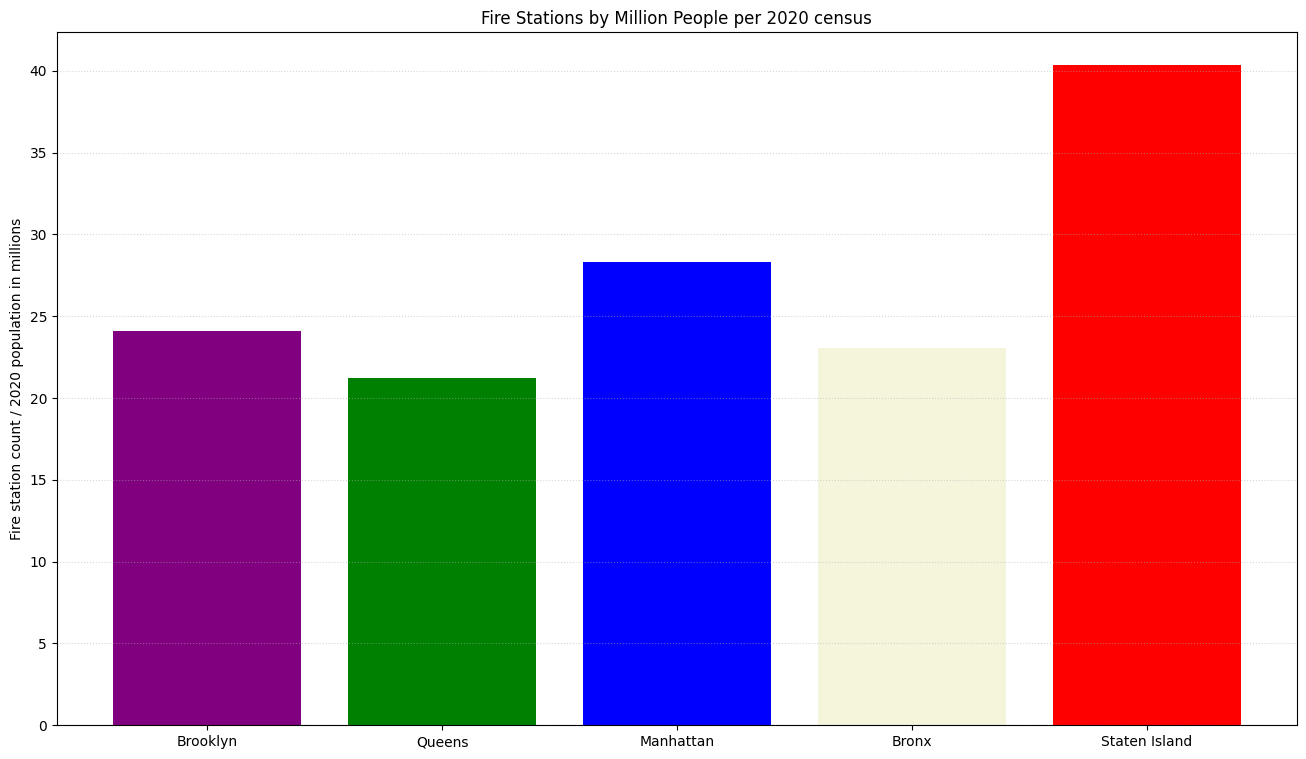

In [122]:
fig, ax = plt.subplots(figsize=(figure_width,figure_height))

Boroughs = df_nycdata_scaled['Borough']
values = df_nycdata_scaled["Firestation_count"] / df_nycdata_scaled["Population_2020_census_million"]
#color=['purple', 'green', 'blue','beige','red']
# Create a bar chart
#ax = value_counts.plot(kind='bar',color=color)
ax.grid(axis='y',alpha = 0.5,linestyle = ":")
ax.bar(Boroughs, values,  color=color)

ax.set_ylabel('Fire station count / 2020 population in millions')
ax.set_title('Fire Stations by Million People per 2020 census')


plt.show()

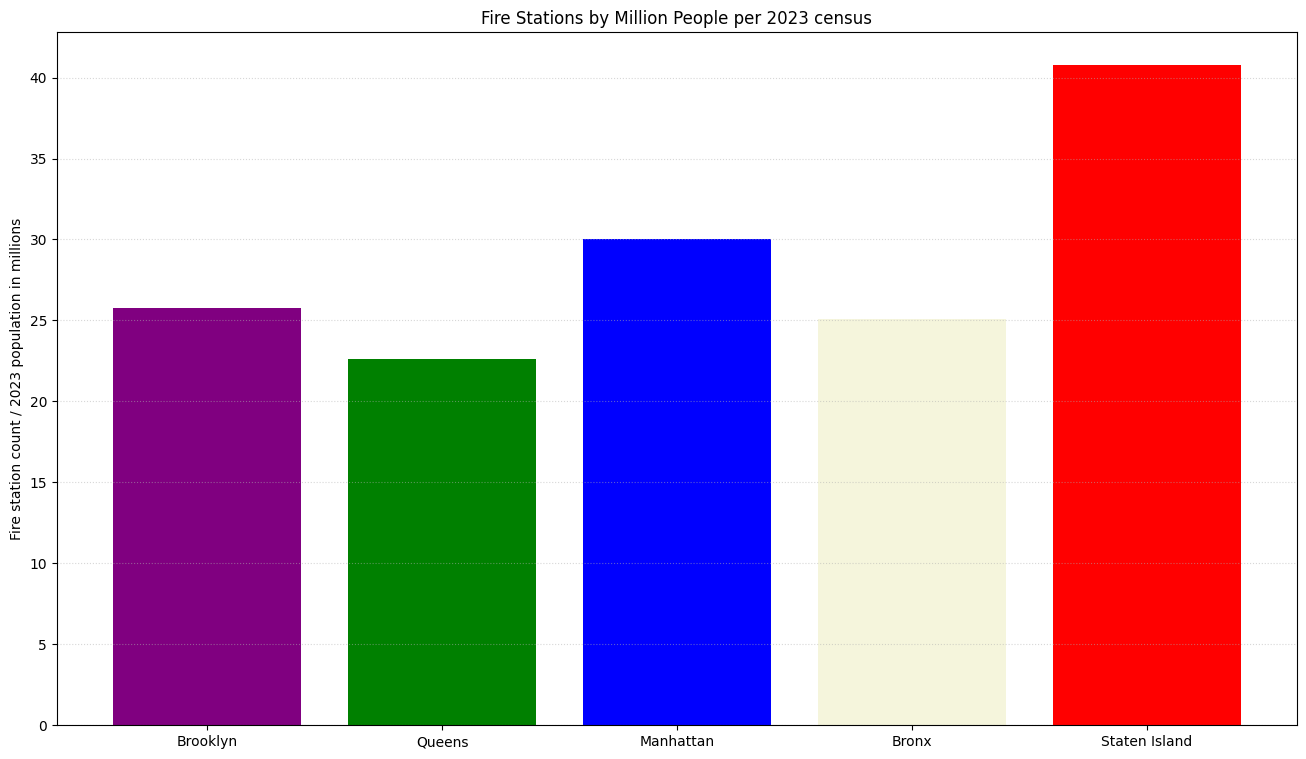

In [123]:
fig, ax = plt.subplots(figsize=(figure_width,figure_height))

Boroughs = df_nycdata_scaled['Borough']
values = df_nycdata_scaled["Firestation_count"] / df_nycdata_scaled["Population_2023_est_million"]
#color=['purple', 'green', 'blue','beige','red']
# Create a bar chart
#ax = value_counts.plot(kind='bar',color=color)

ax.bar(Boroughs, values,  color=color)
ax.grid(axis='y',alpha = 0.5,linestyle = ":")
ax.set_ylabel('Fire station count / 2023 population in millions')
ax.set_title('Fire Stations by Million People per 2023 census')


plt.show()

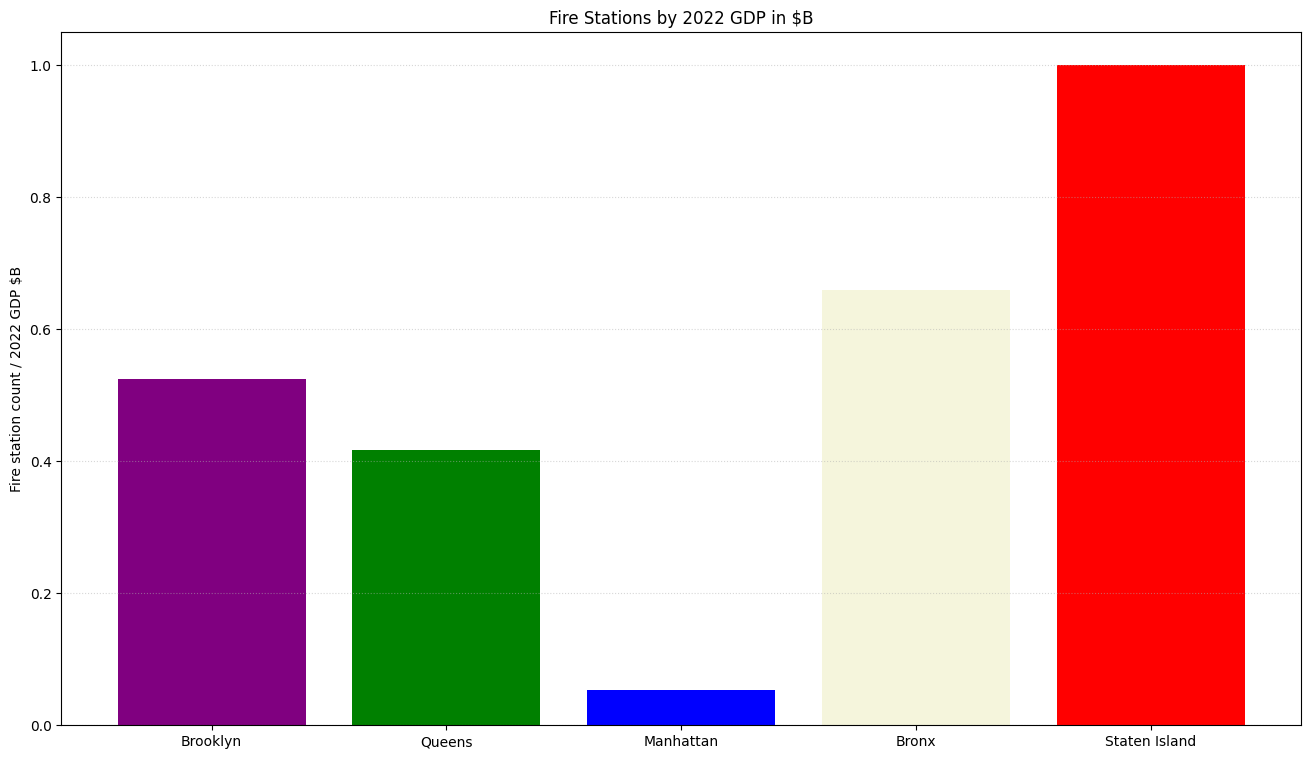

In [124]:
fig, ax = plt.subplots(figsize=(figure_width,figure_height))

Boroughs = df_nycdata_scaled['Borough']
values = df_nycdata_scaled["Firestation_count"] / df_nycdata_scaled["GDP_2022_$B"]
#color=['purple', 'green', 'blue','beige','red']
# Create a bar chart
#ax = value_counts.plot(kind='bar',color=color)

ax.bar(Boroughs, values,  color=color)
ax.grid(axis='y',alpha = 0.5,linestyle = ":")
ax.set_ylabel('Fire station count / 2022 GDP $B')
ax.set_title('Fire Stations by 2022 GDP in $B')


plt.show()

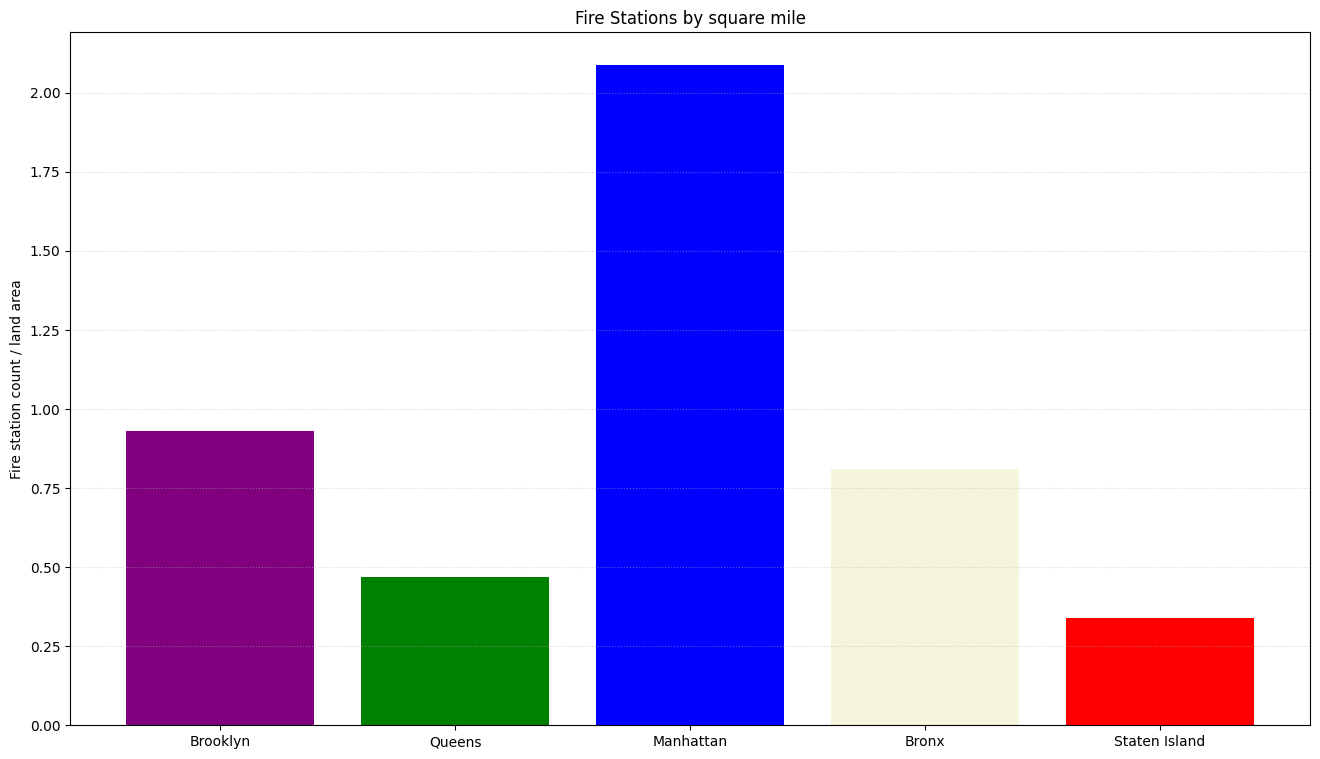

In [125]:
fig, ax = plt.subplots(figsize=(figure_width,figure_height))

Boroughs = df_nycdata_scaled['Borough']
values = df_nycdata_scaled["Firestation_count"] / df_nycdata_scaled["land_area_sqmiles"]
#color=['purple', 'green', 'blue','beige','red']
# Create a bar chart
#ax = value_counts.plot(kind='bar',color=color)

ax.bar(Boroughs, values,  color=color)
ax.grid(axis='y',alpha = 0.5,linestyle = ":")
ax.set_ylabel('Fire station count / land area')
ax.set_title('Fire Stations by square mile')


plt.show()